<a href="https://colab.research.google.com/github/lingfang23/Take-Home-Challenge/blob/main/A_B_testing_Spanish_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish-speaking countries had the same translation of the site which was written by a Spaniard. Therefore, they agreed to try a test where each country would have its own translation written by a local. 

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
user = pd.read_csv('/content/drive/MyDrive/user_table.csv')
test = pd.read_csv('/content/drive/MyDrive/test_table.csv')

In [ ]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [ ]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [ ]:
print(user.shape)
print(test.shape)

(452867, 4)
(453321, 9)


In [ ]:
print(test['user_id'].nunique()==len(test['user_id']))
print(user['user_id'].nunique()==len(user['user_id']))
print(len(user['user_id']) - len(test['user_id'])) 
# Compare to test table, user data miss some user ids. However, it only accounts for a small portion so it's safe to ged rid of those data

True
True
-454


In [ ]:
data = test.merge(user, on=['user_id'])
data.isna().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271174
browser                  0
conversion               0
test                     0
sex                      0
age                      0
country                  0
dtype: int64

## EDA


In [ ]:
data["date"] = pd.to_datetime(data["date"])
data.describe()

,user_id,conversion,test,age
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,0.049560,0.476462,27.130740
std,288676.264784,0.217034,0.499446,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249819.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749543.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


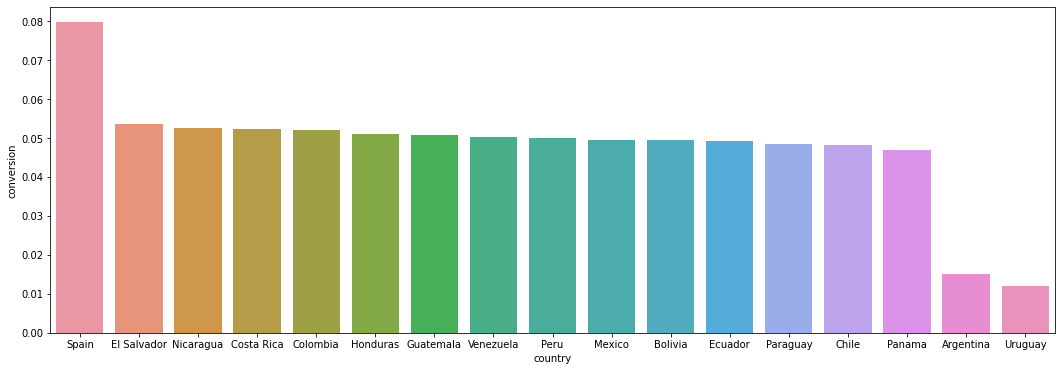

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

groupby_country = data[data['test'] == 0][['conversion', 'country']].groupby('country').mean()
groupby_country = groupby_country.reset_index().sort_values("conversion", ascending = False)

fig, ax = plt.subplots(1,1, figsize=(18,6))
sns.barplot(groupby_country["country"], groupby_country["conversion"],ax=ax)

plt.show()

## T-test


In [ ]:
from scipy import stats

df = data[data["country"]!="Spain"]

test = stats.ttest_ind(df[df['test'] == 1]['conversion'], 
                       df[df['test'] == 0]['conversion'], 
                       equal_var=False
                       )

print("p-value", test.pvalue)

p-value 1.9289178577799033e-13


In [ ]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


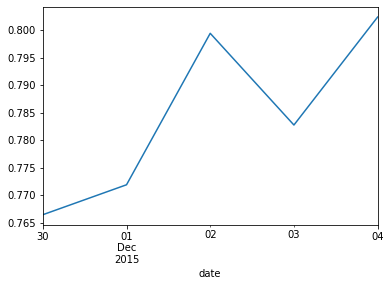

In [ ]:
#compare test and control conversion rate by day and plot it
date_c_1 = data[data["test"]==1].groupby("date")["conversion"].mean()
date_c_2 = data[data["test"]==0].groupby("date")["conversion"].mean()

(date_c_1/date_c_2).plot()